In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

paquetes = pd.read_csv('paquetes.csv')
paquetes.head()

,src,kind,dst,type,timeStamp,timeAfterBegginSniffing,entropia,ip_src,ip_dst
0,3c:06:30:51:ba:08,UNICAST,2e:54:75:b4:8d:90,2048,1.694653e+09,0.945018,0.0,10.210.168.86,31.13.94.52
1,2e:54:75:b4:8d:90,UNICAST,3c:06:30:51:ba:08,2048,1.694653e+09,0.958205,0.0,31.13.94.52,10.210.168.86
2,2e:54:75:b4:8d:90,UNICAST,3c:06:30:51:ba:08,2048,1.694653e+09,1.106818,0.0,31.13.94.52,10.210.168.86
3,3c:06:30:51:ba:08,UNICAST,2e:54:75:b4:8d:90,2048,1.694653e+09,1.110811,0.0,10.210.168.86,31.13.94.52
4,2e:54:75:b4:8d:90,UNICAST,3c:06:30:51:ba:08,2048,1.694653e+09,4.877364,0.0,142.251.133.238,10.210.168.86


In [39]:
paquetes_por_src = paquetes.groupby('src').size()
paquetes_por_src.head()

src
00:28:f8:fc:4a:86    3
00:45:e2:c8:af:d7    1
02:03:3f:20:e6:4f    2
02:b7:fd:04:0f:13    2
02:cd:ac:da:ba:c3    1
dtype: int64

In [40]:
paquetes_por_dst = paquetes.groupby('dst').size()
paquetes_por_dst.head()

dst
01:00:5e:00:00:01      16
01:00:5e:00:00:fb     656
01:00:5e:7f:ff:fa      56
1e:23:e8:86:0a:99       1
2e:54:75:b4:8d:90    2181
dtype: int64

In [41]:
paquetes_por_kind = paquetes.groupby('kind').size()
paquetes_por_kind.head()

kind
BROADCAST     508
UNICAST      9492
dtype: int64

<Axes: xlabel='timeAfterBegginSniffing'>

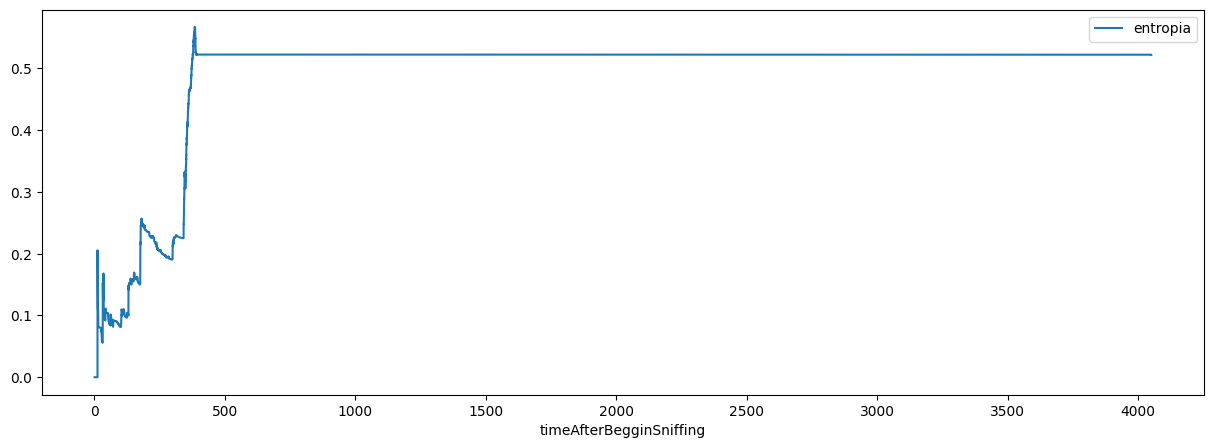

In [93]:
#Grafico la entropia de los paquetes a lo largo del tiempo
paquetes.plot(x='timeAfterBegginSniffing', y='entropia', figsize=(15,5))

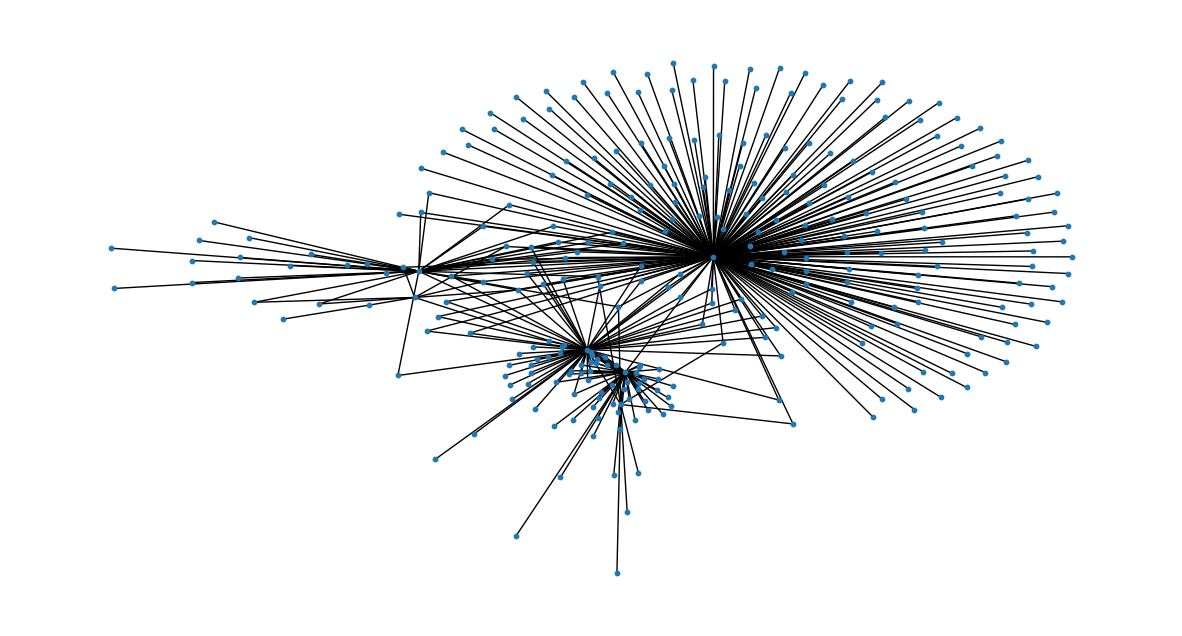

In [59]:
#Hago un grafo con nodos donde cada nodo es una ip y las aristas son los paquetes que se enviaron entre ellas
##poniendo como label en cada nodo en la ip

fig, ax = plt.subplots(figsize=(15,8))
G = nx.Graph()
for index, row in paquetes.iterrows():
    src = row['ip_src']
    dst = row['ip_dst']
    if src == "unknown" or dst == "unknown":
        continue
    if G.has_edge(src, dst):
        G[src][dst]['weight'] += 1
    else:
        G.add_edge(src, dst, weight=1)
nx.draw(G, node_size=10, font_size=10, ax=ax)




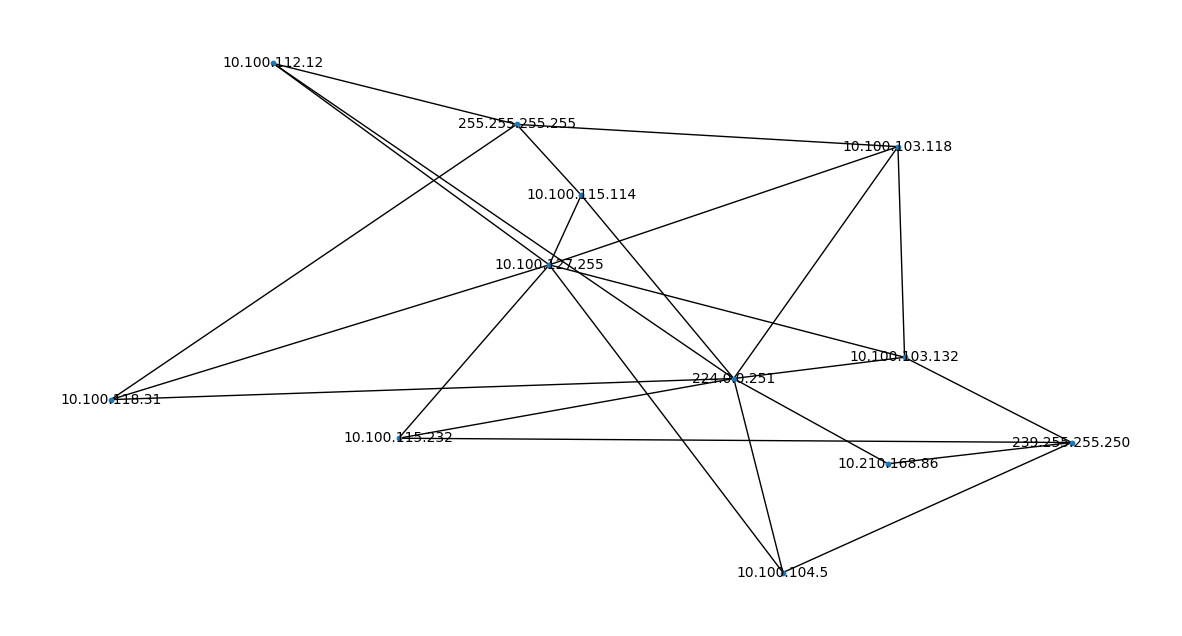

In [77]:
##hago un grafo con los nodos que forman caminos de longitud 3 o mas
##poniendo como label en cada nodo en la ip
fig, ax = plt.subplots(figsize=(15,8))
G = nx.Graph()
nodesToRemove = []
for index, row in paquetes.iterrows():
    src = row['ip_src']
    dst = row['ip_dst']
    if src == "unknown" or dst == "unknown":
        continue
    if G.has_edge(src, dst):
        G[src][dst]['weight'] += 1
    else:
        G.add_edge(src, dst, weight=1)
for node in G.nodes():
    if G.degree(node) < 3:
        nodesToRemove.append(node)
G.remove_nodes_from(nodesToRemove)   
nx.draw(G, with_labels=True, node_size=10, font_size=10, ax=ax)     
        

<Axes: xlabel='ip_src'>

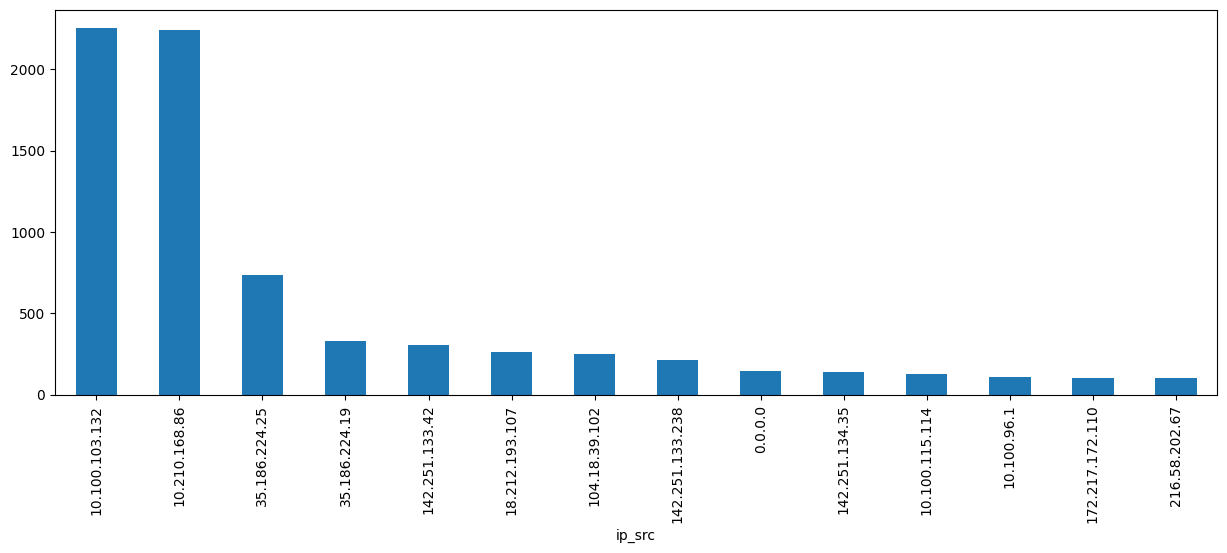

In [79]:
## grafico de barras con la cantidad de request hechos a cada ip
paquetes_por_ip_src = paquetes.groupby('ip_src').size()
## filtro los menores a 10 para que no se vea tan mal el grafico
paquetes_por_ip_src=paquetes_por_ip_src.sort_values(ascending=False)
paquetes_por_ip_src = paquetes_por_ip_src[paquetes_por_ip_src > 100]
## filtro los unknown
paquetes_por_ip_src = paquetes_por_ip_src[paquetes_por_ip_src.index != "unknown"]
paquetes_por_ip_src.plot(kind='bar', figsize=(15,5))
##los ordeno de mayor a menor

<Axes: xlabel='ip_dst'>

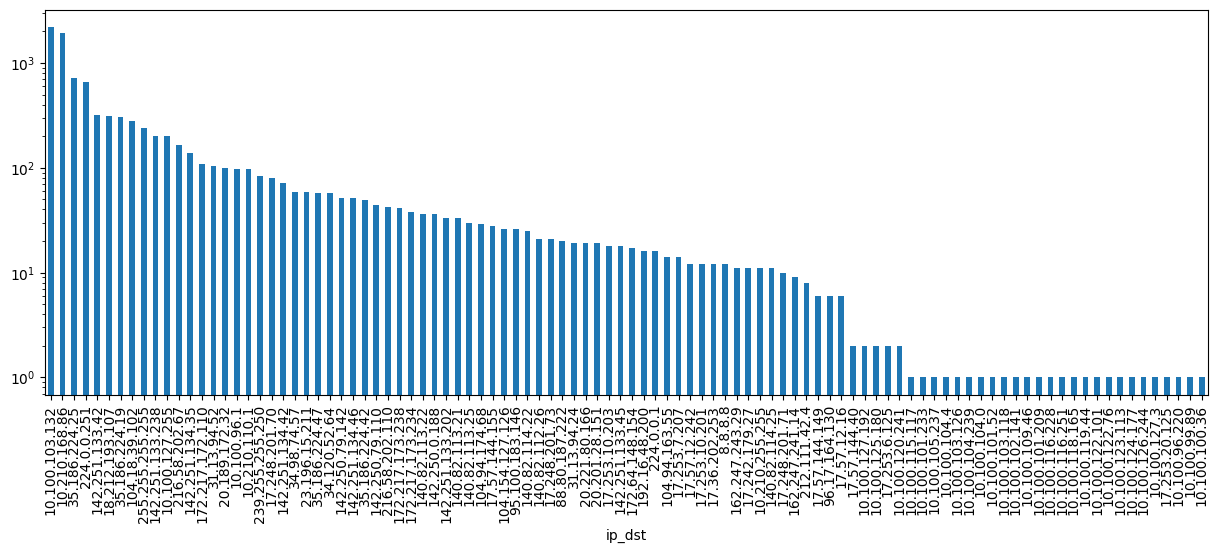

In [91]:
## grafico de barras con la cantidad de request hechos a cada ip
paquetes_por_ip_dst = paquetes.groupby('ip_dst').size()
## filtro los que no recibieron requests
paquetes_por_ip_dst = paquetes_por_ip_dst[paquetes_por_ip_dst > 0]
## filtro los menores a 10 para que no se vea tan mal el grafico
paquetes_por_ip_dst=paquetes_por_ip_dst.sort_values(ascending=False)
## filtro unkown
paquetes_por_ip_dst = paquetes_por_ip_dst[paquetes_por_ip_dst.index != "unknown"]
paquetes_por_ip_dst.plot(kind='bar', figsize=(15,5), logy=True)

<Axes: >

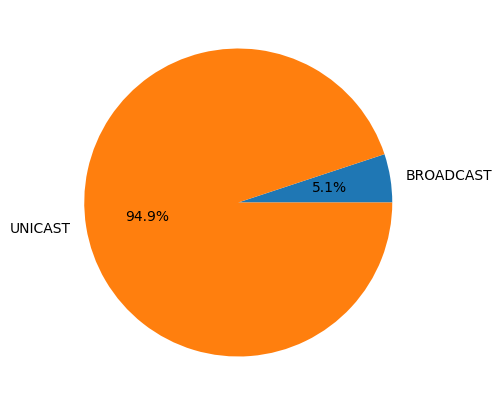

In [85]:
## Grafico de torta de broadcast vs unicast con el porcentaje de cada uno
paquetes_por_kind.plot(kind='pie', figsize=(15,5), autopct='%1.1f%%')


<Axes: >

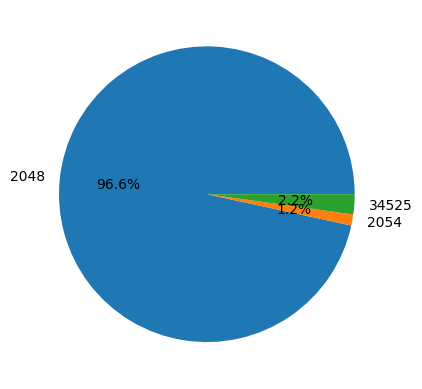

In [90]:
## Grafico de torta los protocolos con el porcentaje de cada uno en 
paquetes_por_protocol = paquetes.groupby('type').size()
paquetes_por_protocol.plot(kind='pie', autopct='%1.1f%%')
